This is an example from simpy.

In [44]:
import random
import numpy as np
import simpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show, xlabel, ylabel, title, errorbar, legend

In [2]:
"""
Bank renege example

Covers:

- Resources: Resource
- Condition events

Scenario:
  A counter with a random service time and customers who renege. Based on the
  program bank08.py from TheBank tutorial of SimPy 2. (KGM)

"""

RANDOM_SEED = 42
NEW_CUSTOMERS = 5  # Total number of customers
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience


def source(env, number, interval, counter):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, f'Customer{i:02d}', counter, time_in_bank=12.0)
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)


def customer(env, name, counter, time_in_bank):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    print(f'{arrive:7.4f} {name}: Here I am')

    with counter.request() as req:
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)

        wait = env.now - arrive

        if req in results:
            # We got to the counter
            print(f'{env.now:7.4f} {name}: Waited {wait:6.3f}')

            tib = random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
            print(f'{env.now:7.4f} {name}: Finished')

        else:
            # We reneged
            print(f'{env.now:7.4f} {name}: RENEGED after {wait:6.3f}')


# Setup and start the simulation
print('Bank renege')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

Bank renege
 0.0000 Customer00: Here I am
 0.0000 Customer00: Waited  0.000
 3.8595 Customer00: Finished
10.2006 Customer01: Here I am
10.2006 Customer01: Waited  0.000
12.7265 Customer02: Here I am
13.9003 Customer02: RENEGED after  1.174
23.7507 Customer01: Finished
34.9993 Customer03: Here I am
34.9993 Customer03: Waited  0.000
37.9599 Customer03: Finished
40.4798 Customer04: Here I am
40.4798 Customer04: Waited  0.000
43.1401 Customer04: Finished


The following is from ChatGPT.

In [3]:
def exponential(x):  # function of exponential distribution 
    return random.expovariate(x)

def deterministic(x):   # function of deterministic time
    return x 

def hyperexponential(A):   # fucntion takes tuple
    a , b = A[0], A[1]
    z=random.random()     # create random number from (0,1)
    if z < 0.75:         # with 75% chance, generate exponential distribution number with mean 1/a 
        x = random.expovariate(a)
    else:
        x = random.expovariate(b)    # with 25% chance, generate exponential distribution number with mean 1/b

    return x

In [4]:
import simpy
import random

# Customer class to model the customers arriving at the system
class Customer:
    def __init__(self, arrival_time):
        self.arrival_time = arrival_time
        self.wait_time = 0
        self.service_time = 0
        self.system_time = 0

def customer_arrivals(env, servers, sim_duration, function_arrival_times, function_service_times):
    """Handles the arrival of customers."""
    customer_id = 0
    while env.now < sim_duration:
        customer_id += 1
        arrival_time = env.now
        customer = Customer(arrival_time)
        print(f"Time {env.now:.2f}: Customer {customer_id} arrives.")
        env.process(customer_service(env, customer, servers, customer_id, function_service_times))
        yield env.timeout(function_arrival_times(l))  # Exponential inter-arrival time

def customer_service(env, customer, servers, customer_id, function_service_times):
    """Simulates the service of a customer."""
    # Request a server
    with servers.request() as request:
        print(f"Time {env.now:.2f}: Customer {customer_id} waits for a server.")
        yield request  # Wait for a free server
        
        # Customer starts service
        wait_time = env.now - customer.arrival_time
        customer.wait_time = wait_time
        service_time = function_service_times(u)  # Exponential service time
        customer.service_time = service_time
        print(f"Time {env.now:.2f}: Customer {customer_id} starts service. Wait time = {wait_time:.2f}, Service time = {service_time:.2f}")

        # Simulate service time
        yield env.timeout(service_time)
        
        # Customer completes service
        customer.system_time = env.now - customer.arrival_time
        print(f"Time {env.now:.2f}: Customer {customer_id} finishes service. Total time in system = {customer.system_time:.2f}")

        # Store results
        waiting_times.append(customer.wait_time)
        system_times.append(customer.system_time)


Lets run simulation with exponential arrival and service times.

Time 0.00: Customer 1 arrives.
Time 0.00: Customer 1 waits for a server.
Time 0.00: Customer 1 starts service. Wait time = 0.00, Service time = 1.88
Time 0.03: Customer 2 arrives.
Time 0.03: Customer 2 waits for a server.
Time 0.03: Customer 2 starts service. Wait time = 0.00, Service time = 0.29
Time 0.32: Customer 3 arrives.
Time 0.32: Customer 3 waits for a server.
Time 0.32: Customer 3 starts service. Wait time = 0.00, Service time = 0.60
Time 0.32: Customer 2 finishes service. Total time in system = 0.29
Time 0.45: Customer 4 arrives.
Time 0.45: Customer 4 waits for a server.
Time 0.45: Customer 4 starts service. Wait time = 0.00, Service time = 1.55
Time 0.67: Customer 5 arrives.
Time 0.67: Customer 5 waits for a server.
Time 0.67: Customer 5 starts service. Wait time = 0.00, Service time = 0.03
Time 0.68: Customer 6 arrives.
Time 0.68: Customer 6 waits for a server.
Time 0.68: Customer 6 starts service. Wait time = 0.00, Service time = 0.57
Time 0.69: Customer 5 finishes service

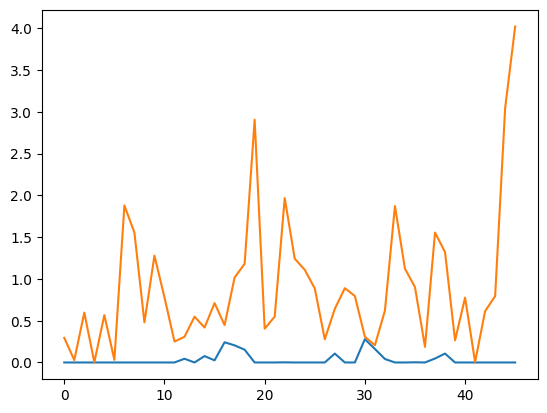

In [6]:
# Parameters
l = 5  # Rate of customer arrivals (lambda)
u = 1  # Rate of service (mu)
m = 5  # Number of servers
sim_duration = 10  # Simulation duration (in time units)

# Lists to store results
waiting_times = []
system_times = []


# Initialize the environment and server pool
random.seed(1)
env = simpy.Environment()
servers = simpy.Resource(env, capacity=m)

# Start the arrival process
env.process(customer_arrivals(env, servers, sim_duration, exponential, exponential))

# Run the simulation
env.run()

# Output the results
print(f"\nAverage waiting time: {sum(waiting_times) / len(waiting_times):.2f}")
print(f"Average system time: {sum(system_times) / len(system_times):.2f}")
print(f"Total customers served: {len(waiting_times)}")

plt.plot(waiting_times)
plt.plot(system_times)
plt.show()

Let's run simulation with deterministic times.

In [76]:
# Parameters
l = 1  # time between arrivals
u = 3  # time of service
m = 2  # Number of servers
sim_duration = 10  # Simulation duration (in time units)

# Lists to store results
waiting_times = []
system_times = []


# Initialize the environment and server pool
env = simpy.Environment()
servers = simpy.Resource(env, capacity=m)

# Start the arrival process
env.process(customer_arrivals(env, servers, sim_duration, exponential, deterministic))

# Run the simulation
env.run()

# Output the results
print(f"\nAverage waiting time: {sum(waiting_times) / len(waiting_times):.2f}")
print(f"Average system time: {sum(system_times) / len(system_times):.2f}")
print(f"Total customers served: {len(waiting_times)}")

Time 0.00: Customer 1 arrives.
Time 0.00: Customer 1 waits for a server.
Time 0.00: Customer 1 starts service. Wait time = 0.00, Service time = 3.00
Time 0.59: Customer 2 arrives.
Time 0.59: Customer 2 waits for a server.
Time 0.59: Customer 2 starts service. Wait time = 0.00, Service time = 3.00
Time 0.68: Customer 3 arrives.
Time 0.68: Customer 3 waits for a server.
Time 1.10: Customer 4 arrives.
Time 1.10: Customer 4 waits for a server.
Time 2.14: Customer 5 arrives.
Time 2.14: Customer 5 waits for a server.
Time 3.00: Customer 1 finishes service. Total time in system = 3.00
Time 3.00: Customer 3 starts service. Wait time = 2.32, Service time = 3.00
Time 3.59: Customer 2 finishes service. Total time in system = 3.00
Time 3.59: Customer 4 starts service. Wait time = 2.49, Service time = 3.00
Time 4.34: Customer 6 arrives.
Time 4.34: Customer 6 waits for a server.
Time 4.46: Customer 7 arrives.
Time 4.46: Customer 7 waits for a server.
Time 5.18: Customer 8 arrives.
Time 5.18: Custome

Let's run a simulation with hyperexponential times.

In [77]:
# Parameters
l = 4  # time between arrivals
u = np.array([5, 1])  # time of service
m = 2  # Number of servers
sim_duration = 10  # Simulation duration (in time units)

# Lists to store results
waiting_times = []
system_times = []


# Initialize the environment and server pool
env = simpy.Environment()
servers = simpy.Resource(env, capacity=m)

# Start the arrival process
env.process(customer_arrivals(env, servers, sim_duration, exponential, hyperexponential))

# Run the simulation
env.run()

# Output the results
print(f"\nAverage waiting time: {sum(waiting_times) / len(waiting_times):.2f}")
print(f"Average system time: {sum(system_times) / len(system_times):.2f}")
print(f"Total customers served: {len(waiting_times)}")

Time 0.00: Customer 1 arrives.
Time 0.00: Customer 1 waits for a server.
Time 0.00: Customer 1 starts service. Wait time = 0.00, Service time = 0.03
Time 0.03: Customer 1 finishes service. Total time in system = 0.03
Time 0.19: Customer 2 arrives.
Time 0.19: Customer 2 waits for a server.
Time 0.19: Customer 2 starts service. Wait time = 0.00, Service time = 0.39
Time 0.40: Customer 3 arrives.
Time 0.40: Customer 3 waits for a server.
Time 0.40: Customer 3 starts service. Wait time = 0.00, Service time = 0.22
Time 0.41: Customer 4 arrives.
Time 0.41: Customer 4 waits for a server.
Time 0.57: Customer 5 arrives.
Time 0.57: Customer 5 waits for a server.
Time 0.58: Customer 2 finishes service. Total time in system = 0.39
Time 0.58: Customer 4 starts service. Wait time = 0.17, Service time = 0.16
Time 0.62: Customer 3 finishes service. Total time in system = 0.22
Time 0.62: Customer 5 starts service. Wait time = 0.05, Service time = 1.48
Time 0.74: Customer 4 finishes service. Total time 

In the following, lets find out which system is better. One powerful m*u server or m servers of power u.

In [90]:
# case several servers
l = 4  # Rate of customer arrivals (lambda)
u = 1  # Rate of service (mu)
m = 4  # Number of servers
sim_duration = 100  # Simulation duration (in time units)

# Lists to store results
waiting_times = []
system_times = []


# Initialize the environment and server pool
env = simpy.Environment()
servers = simpy.Resource(env, capacity=m)

# Start the arrival process
env.process(customer_arrivals(env, servers, sim_duration, exponential, exponential))

# Run the simulation
env.run()

# Output the results
print(f"\nAverage waiting time: {sum(waiting_times) / len(waiting_times):.2f}")
print(f"Average system time: {sum(system_times) / len(system_times):.2f}")
print(f"Total customers served: {len(waiting_times)}")

waiting_times_several_servers = waiting_times

Time 0.00: Customer 1 arrives.
Time 0.00: Customer 1 waits for a server.
Time 0.00: Customer 1 starts service. Wait time = 0.00, Service time = 0.43
Time 0.12: Customer 2 arrives.
Time 0.12: Customer 2 waits for a server.
Time 0.12: Customer 2 starts service. Wait time = 0.00, Service time = 1.12
Time 0.18: Customer 3 arrives.
Time 0.18: Customer 3 waits for a server.
Time 0.18: Customer 3 starts service. Wait time = 0.00, Service time = 0.22
Time 0.32: Customer 4 arrives.
Time 0.32: Customer 4 waits for a server.
Time 0.32: Customer 4 starts service. Wait time = 0.00, Service time = 1.10
Time 0.35: Customer 5 arrives.
Time 0.35: Customer 5 waits for a server.
Time 0.39: Customer 3 finishes service. Total time in system = 0.22
Time 0.39: Customer 5 starts service. Wait time = 0.05, Service time = 0.69
Time 0.43: Customer 1 finishes service. Total time in system = 0.43
Time 0.43: Customer 6 arrives.
Time 0.43: Customer 6 waits for a server.
Time 0.43: Customer 6 starts service. Wait tim

In [91]:
# case one powerful server
l = 4  # Rate of customer arrivals (lambda)
u = 4  # Rate of service (mu)
m = 1  # Number of servers
sim_duration = 100  # Simulation duration (in time units)

# Lists to store results
waiting_times = []
system_times = []


# Initialize the environment and server pool
random.seed(1)
env = simpy.Environment()
servers = simpy.Resource(env, capacity=m)

# Start the arrival process
env.process(customer_arrivals(env, servers, sim_duration, exponential, exponential))

# Run the simulation
env.run()

# Output the results
print(f"\nAverage waiting time: {sum(waiting_times) / len(waiting_times):.2f}")
print(f"Average system time: {sum(system_times) / len(system_times):.2f}")
print(f"Total customers served: {len(waiting_times)}")

waiting_times_powerful_server = waiting_times

Time 0.00: Customer 1 arrives.
Time 0.00: Customer 1 waits for a server.
Time 0.00: Customer 1 starts service. Wait time = 0.00, Service time = 0.47
Time 0.04: Customer 2 arrives.
Time 0.04: Customer 2 waits for a server.
Time 0.40: Customer 3 arrives.
Time 0.40: Customer 3 waits for a server.
Time 0.47: Customer 1 finishes service. Total time in system = 0.47
Time 0.47: Customer 2 starts service. Wait time = 0.43, Service time = 0.17
Time 0.47: Customer 4 arrives.
Time 0.47: Customer 4 waits for a server.
Time 0.62: Customer 5 arrives.
Time 0.62: Customer 5 waits for a server.
Time 0.64: Customer 2 finishes service. Total time in system = 0.60
Time 0.64: Customer 3 starts service. Wait time = 0.24, Service time = 0.39
Time 0.88: Customer 6 arrives.
Time 0.88: Customer 6 waits for a server.
Time 0.91: Customer 7 arrives.
Time 0.91: Customer 7 waits for a server.
Time 0.92: Customer 8 arrives.
Time 0.92: Customer 8 waits for a server.
Time 1.03: Customer 3 finishes service. Total time i

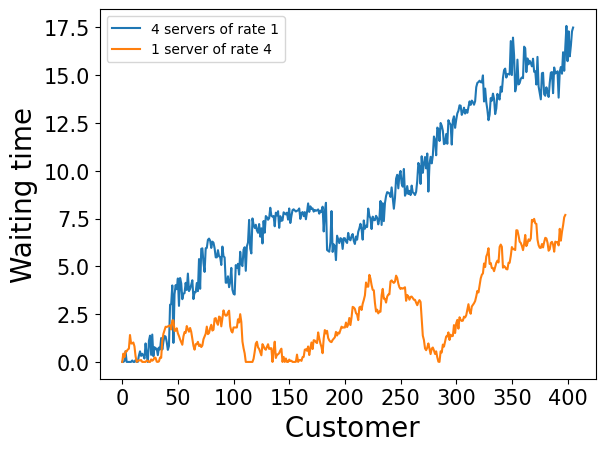

In [92]:
plt.plot(waiting_times_several_servers, label = "4 servers of rate 1")
plt.plot(waiting_times_powerful_server, label = "1 server of rate 4")
plt.legend(loc=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
xlabel(" Customer", fontsize = 20)
ylabel("Waiting time", fontsize = 20)
plt.savefig("unique_vs_several_servers.png")
plt.show()

Zaina's code: 

In [70]:
class queue:
    def __init__(self, env, lambd, mu, n):
        '''
        Initializes object values in environment.
        Parameters:
        ----------
        lambd: Arrival rate into the system (λ)
        mu: Capacity of each server (μ)
        n: Number of servers
        '''
        self.env = env
        self.lambd = lambd
        self.mu = mu
        self.n = n
        self.servers = simpy.Resource(env, capacity=n)
        self.waiting_times = []
    
    def service_process(self):
        '''
        Process for each customer in the system. 
        '''
        arrival_time = self.env.now

        with self.servers.request() as request:
            # Wait for request
            yield request
            
            # Calculate and store waiting time after request has been approved
            waiting_time = self.env.now - arrival_time
            self.waiting_times.append(waiting_time)
            
            service_time = random.expovariate(self.mu)
            
            # Simulate service
            yield self.env.timeout(service_time)
    
    def arrival_process(self):
        '''
        Generates customer arrivals with exponential times between arrivals.
        '''
        while True:
            # Calculate time until arrival
            yield self.env.timeout(random.expovariate(self.lambd))
            
            # Continue to service process after arrival
            self.env.process(self.service_process())
    
    def average_wait_time_run(self, simulation_time):
        self.env.process(self.arrival_process())
        self.env.run(until=simulation_time)
        avg_waiting_time = np.mean(self.waiting_times) if self.waiting_times else 0
        std_waiting_time = np.std(self.waiting_times)
        
        return avg_waiting_time, std_waiting_time, len(self.waiting_times)

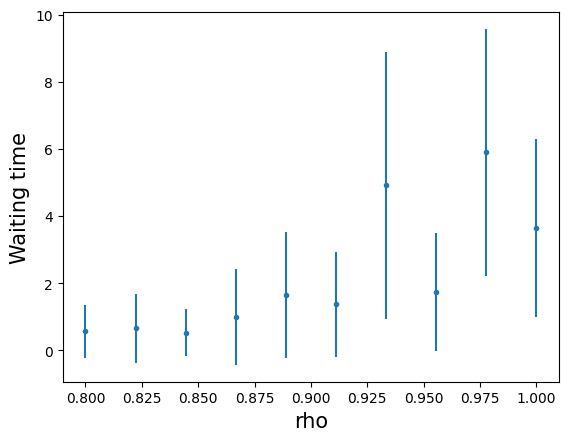

In [ ]:
rho = np.linspace(0.8, 1.0, 10)
mu = 1 
m = 5
lambd = rho*mu*m
simulation_time = 1000
mean_tot = []
std_tot = []
    
for i in lambd:
    env = simpy.Environment()
    simulation = queue(env, i, mu, m)
    me, st = simulation.average_wait_time_run(simulation_time)
    mean_tot.append(me)
    std_tot.append(st)

errorbar(rho, mean_tot, yerr=std_tot, fmt='.')
xlabel("rho", fontsize = 15)
ylabel("Waiting time", fontsize = 15)
#yscale('log')
#legend(loc=4)
#title("Ajuste de Pantheon y Planck a los datos de SNIa",fontsize = 15)
show()

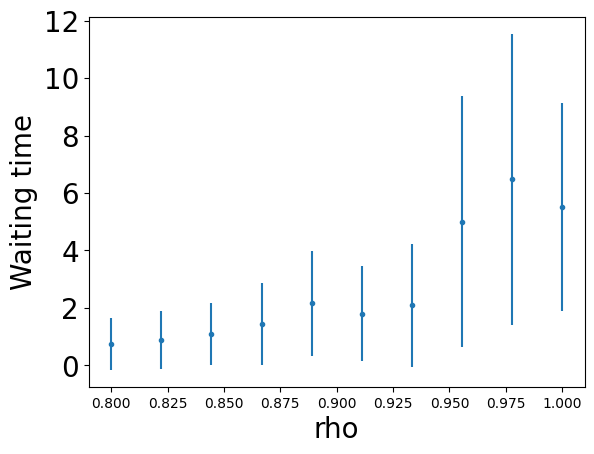

In [ ]:
rho = np.linspace(0.8, 1.0, 10)
mu = 5 
m = 1
lambd = rho*mu*m
simulation_time = 1000
mean_tot = []
std_tot = []
    
for i in lambd:
    env = simpy.Environment()
    simulation = queue(env, i, mu, m)
    me, st = simulation.average_wait_time_run(simulation_time)
    mean_tot.append(me)
    std_tot.append(st)


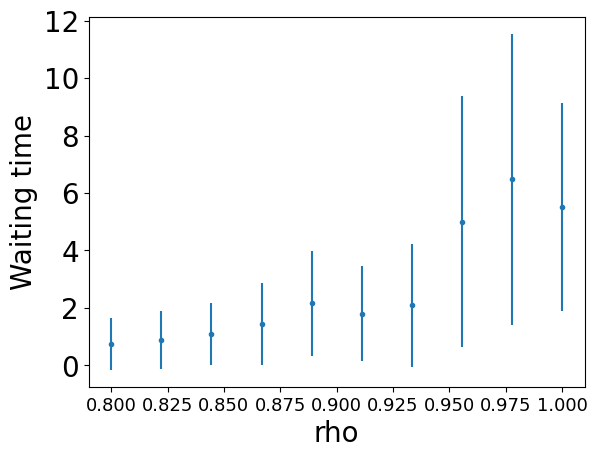

In [ ]:

errorbar(rho, mean_tot, yerr=std_tot, fmt='.')
xlabel("rho", fontsize = 20)
ylabel("Waiting time", fontsize = 20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
show()

And know let's see how it gets better with more servers.

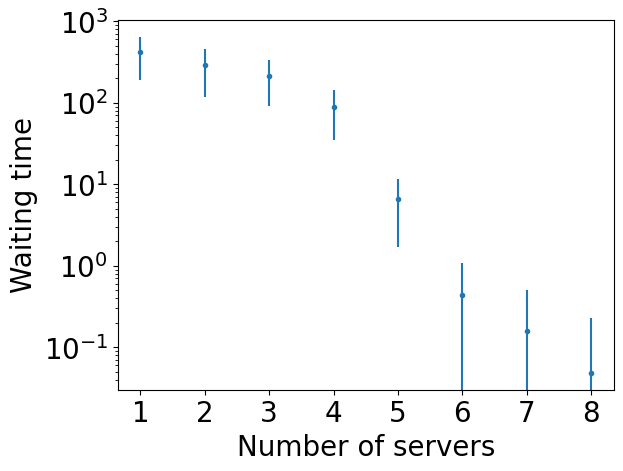

In [54]:
mu = 1
lambd = 5
m = [1, 2, 3, 4, 5, 6, 7, 8]
simulation_time = 1000
mean_tot = []
std_tot = []
    
for i in m:
    env = simpy.Environment()
    simulation = queue(env, lambd, mu, i)
    me, st = simulation.average_wait_time_run(simulation_time)
    mean_tot.append(me)
    std_tot.append(st)

plt.errorbar(m, mean_tot, yerr=std_tot, fmt='.')
plt.xlabel("Number of servers", fontsize = 20)
plt.ylabel("Waiting time", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.savefig('more_servers_better.png')
plt.show()

### Problem 3

Let's simulate a shortest job first queue.

In [65]:
class customer_priority:
    def __init__(self, env, l, u, m, sim_duration):
        self.env = env
        self.sim_duration = sim_duration
        self.l = l
        self.u = u
        self.m = m
        self.servers = simpy.Resource(env, capacity=self.m)
        self.queue = []
        self.waiting_times = []
    
    def arrival(self):
        while self.env.now < sim_duration:
            yield self.env.timeout(exponential(l))

            arrival_time = self.env.now
            service_time = exponential(u)
            self.queue.append((arrival_time, service_time))
            self.queue.sort(key = lambda x: x[1])

            self.env.process(customer_priority.service(self))

    def service(self):
        while self.queue:
            arrival_time, service_time = self.queue[0]
            self.queue.pop(0)
            waiting_time = self.env.now - arrival_time
            self.waiting_times.append(waiting_time)
            yield self.env.timeout(service_time)
    
    def average_waiting(self):
        self.env.process(customer_priority.arrival(self))
        self.env.run()
        n = len(waiting_times)
        mean_waiting_times = sum(self.waiting_times)/n
        desv_waiting_times = np.sqrt(sum((self.waiting_times-mean_waiting_times)**2)/(n-1))

        return mean_waiting_times, desv_waiting_times

In [66]:
# Parameters
l = 3
u = 1
m = 4
sim_duration = 10

env = simpy.Environment()
results = customer_priority(env, l, u, m, sim_duration)
mean, desv = results.average_waiting()
print(f"\nAverage waiting time: {mean:.2f}")
print(f"\nStandard deviation waiting time: {desv:.2f}")

ZeroDivisionError: float division by zero

Lets try again with not OOP.

In [6]:
# Customer class to model the customers arriving at the system
class Customer:
    def __init__(self, arrival_time):
        self.arrival_time = arrival_time
        self.wait_time = 0
        self.service_time = 0
        self.system_time = 0
        self.queue = []

def customer_arrivals(env, servers, sim_duration, function_arrival_times, function_service_times):
    """Handles the arrival of customers."""
    customer_id = 0
    while env.now < sim_duration:
        customer_id += 1
        arrival_time = env.now
        service_time = function_service_times(u)
        self.queue.append((customer_id, service_time))
        customer = Customer(arrival_time)
        print(f"Time {env.now:.2f}: Customer {customer_id} arrives.")
        env.process(customer_service(env, customer, servers, customer_id, function_service_times))
        yield env.timeout(function_arrival_times(l))  # Exponential inter-arrival time

def customer_service(env, customer, servers, customer_id, function_service_times):
    """Simulates the service of a customer."""
    # Request a server
    while self.queue:
        print(f"Time {env.now:.2f}: Customer {customer_id} waits for a server.")
        yield request  # Wait for a free server
        
        # Customer starts service
        wait_time = env.now - customer.arrival_time
        customer.wait_time = wait_time
        customer.service_time = service_time

        print(f"Time {env.now:.2f}: Customer {customer_id} starts service. Wait time = {wait_time:.2f}, Service time = {service_time:.2f}")

        # Simulate service time
        yield env.timeout(service_time)
        
        # Customer completes service
        customer.system_time = env.now - customer.arrival_time
        print(f"Time {env.now:.2f}: Customer {customer_id} finishes service. Total time in system = {customer.system_time:.2f}")

        # Store results
        waiting_times.append(customer.wait_time)
        system_times.append(customer.system_time)

Zaina's code:

In [71]:
class MM1SJFQueueSimulation:
    def __init__(self, env, lambd, mu):
        self.env = env
        self.lambd = lambd
        self.mu = mu
        self.waiting_times = []
        self.queue = []
        self.server_busy = False

    def arrival_process(self):
        while True:
            # Calculate time until next arrival
            yield self.env.timeout(random.expovariate(self.lambd))
            
            # Calculate service and arrival times to sort shortest job
            arrival_time = self.env.now
            service_time = random.expovariate(self.mu)
            
            # Stores and sorts jobs based on service time into queue 
            self.queue.append((arrival_time, service_time))
            self.queue.sort(key=lambda x: x[1])
            
            # If server is free, continue to the service process
            if not self.server_busy:
                self.env.process(self.service_process())

    def service_process(self):
        while self.queue:
            # Completes service process and removes shortest job from queue when done
            self.server_busy = True
            arrival_time, service_time = self.queue.pop(0)
            waiting_time = self.env.now - arrival_time
            self.waiting_times.append(waiting_time)
            
            yield self.env.timeout(service_time)
        
        self.server_busy = False

    def average_wait_time_run(self, simulation_time):
        self.env.process(self.arrival_process())
        self.env.run(until=simulation_time)
        avg_waiting_time = np.mean(self.waiting_times) if self.waiting_times else 0
        
        return avg_waiting_time, len(self.waiting_times)

In [ ]:
lambd = 1.5 
mu = 0.6   
simulation_time = 100

env = simpy.Environment()
simulation2 = MM1SJFQueueSimulation(env, lambd, mu)
results2 = simulation2.average_wait_time_run(simulation_time)

print(f'Average Waiting Time for Shortest Job First Simulation (n=1): {results2: .2f}')

Average Waiting Time for Shortest Job First Simulation (n=1):  23.69


Let's compare which has lower waiting times: FIFO first in first out or SJF shortest job first.

In [74]:
rho = np.linspace(0.5, 1, 6)
u = 1
l = rho*u
simulation_time = 1000
results3 = []

for i in l:
    env = simpy.Environment()
    simulation3 = MM1SJFQueueSimulation(env, i, u)
    avg, number_costumers = simulation3.average_wait_time_run(simulation_time)
    results3.append(avg)
    print(avg, number_costumers)


0.6682962055538819 472
0.6343587187352229 594
1.2350768111784385 709
2.184057297898035 828
2.8288673052220537 880
2.9346215579061763 933


In [ ]:
rho = np.linspace(0.5, 1, 6)
u = 1
l = rho*u
simulation_time = 1000
results4 = []

for i in l:
    env = simpy.Environment()
    simulation4 = queue(env, i, u, 1)
    mean4, std4, number_costumers = simulation4.average_wait_time_run(simulation_time)
    results4.append(mean4)
    print(mean4, number_costumers)

0.8065726332259138 474
1.2454768765569544 596
2.3102359754579096 698
3.541453196867246 793
3.533161490138659 866
5.840995984866528 960


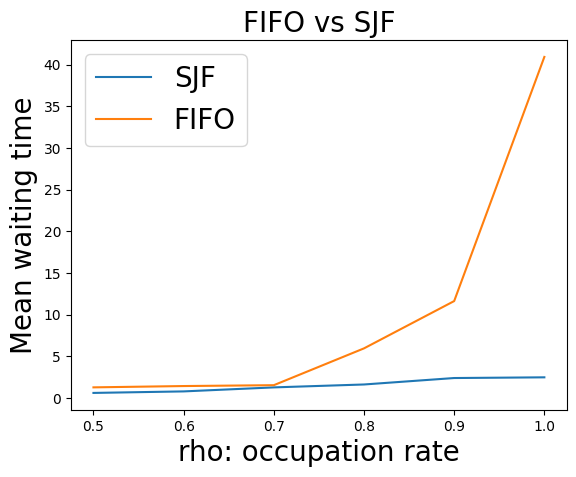

In [58]:

plt.plot(rho, results3, label = "SJF")
plt.plot(rho, results4, label = "FIFO")
plt.xlabel("rho: occupation rate", fontsize = 20)
plt.ylabel("Mean waiting time", fontsize = 20)
plt.title("FIFO vs SJF", fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig("FIFO_vs_SJF")
plt.show()


This is a try of making object oriented program.

In [42]:
# Customer class to model the customers arriving at the system
class Customer_SJF:
    def __init__(self, env, function_arrival_times, l, function_service_times, u, m, sim_duration):
        self.env = env
        self.sim_duration = sim_duration
        self.l = l
        self.u = u
        self.m = m
        self.servers = simpy.Resource(env, capacity=self.m)
        self.wait_time = 0
        self.service_time = 0
        self.system_time = 0
        self.events = []

    def customer_arrivals(self):
        """Handles the arrival of customers."""
        customer_id = 0
        while self.env.now < sim_duration:
            customer_id += 1
            self.arrival_time = self.env.now
            self.service_time = function_service_times(u)  
            self.events.append((self.arrival_time, self.service_time))
            self.events.sort(key= lambda x: x[1])

            #customer = Customer(self.arrival_time)
            print(f"Time {env.now:.2f}: Customer {customer_id} arrives.")

            self.env.process(costumer_service())
            yield self.env.timeout(function_arrival_times(l))  # Exponential inter-arrival time

    def customer_service(self):
        """Simulates the service of a customer."""
        # Request a server
        with servers.request() as request:
            print(f"Time {env.now:.2f}: Customer {customer_id} waits for a server.")
            yield request  # Wait for a free server
        
        # Customer starts service
            self.wait_time = self.env.now - customer.arrival_time
            customer.wait_time = self.wait_time
            self.service_time = function_service_times(u)  # Exponential service time
            customer.service_time = self.service_time
            print(f"Time {env.now:.2f}: Customer {customer_id} starts service. Wait time = {wait_time:.2f}, Service time = {service_time:.2f}")

        # Simulate service time
            yield env.timeout(self.service_time)
        
        # Customer completes service
            customer.system_time = self.env.now - customer.arrival_time
            print(f"Time {env.now:.2f}: Customer {customer_id} finishes service. Total time in system = {customer.system_time:.2f}")

        # Store results
            waiting_times.append(customer.wait_time)
            system_times.append(customer.system_time)

In [47]:
# Parameters
l = 4  # Rate of customer arrivals (lambda)
u = 1  # Rate of service (mu)
m = 5  # Number of servers
sim_duration = 10  # Simulation duration (in time units)

# Initialize the environment and server pool
env = simpy.Environment()

# Start the arrival process
env.process(Customer_SJF( env, exponential, l, exponential, u, m, sim_duration))

env.run()

ValueError: <__main__.Customer_SJF object at 0x7ac6bccaab10> is not a generator.